<a href="https://colab.research.google.com/github/KajalDahiya/Crop_management/blob/main/Copy_of_crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
crop= pd.read_csv('crop_production.csv',encoding='ISO-8859-1')
crop.head(10)

Populating the interactive namespace from numpy and matplotlib


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0


In [ ]:
print(crop.isnull().sum())

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


In [ ]:
print("Data Shape:",crop.shape)
print("\nData Info:")
print(crop.info(),"\n")

Data Shape: (246091, 7)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB
None 



<Axes: >

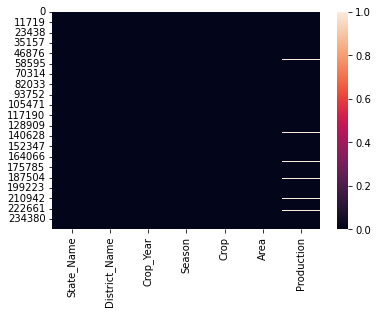

In [ ]:
sns.heatmap(crop.isnull())

In [ ]:
crop.corr()

,Crop_Year,Area,Production
Crop_Year,1.000000,-0.026022,0.006989
Area,-0.026022,1.000000,0.040587
Production,0.006989,0.040587,1.000000


<Axes: >

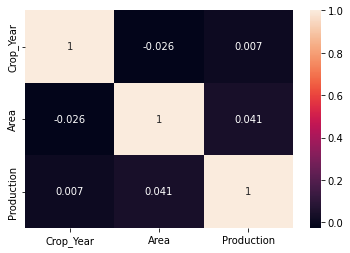

In [ ]:
sns.heatmap(crop.corr(), annot=True)

In [ ]:
crop.nunique()

State_Name          33
District_Name      646
Crop_Year           19
Season               6
Crop               124
Area             38442
Production       51627
dtype: int64

In [ ]:
top_crop = crop.groupby(by=['Season']).sum().round(2)
top_crop = top_crop.sort_values('Production', ascending=False).head(10)

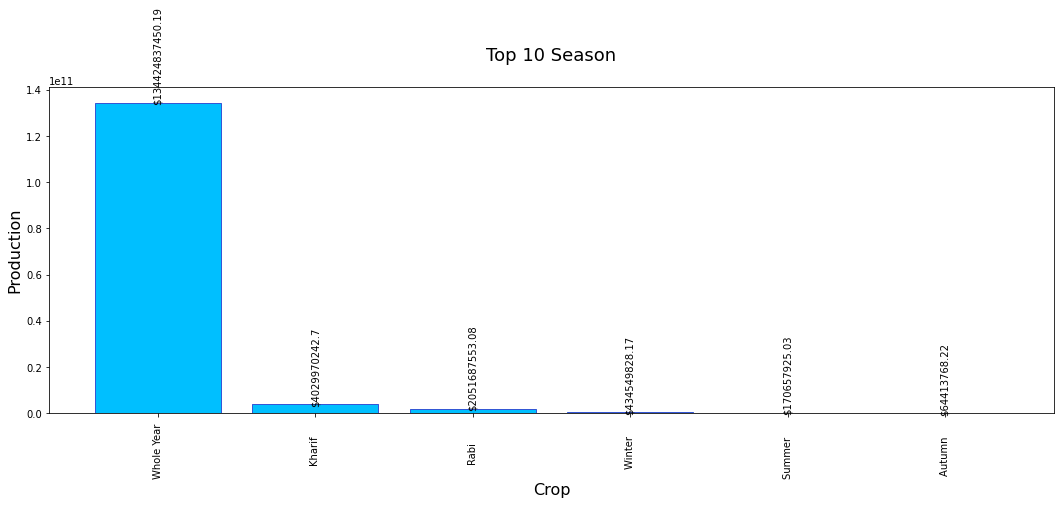

In [ ]:
plt.figure(figsize=[18,6])
plt.bar(top_crop.index, top_crop.Production, color='#00BFFF', edgecolor='#3457D5')
plt.xticks(rotation=90)
plt.title("Top 10 Season\n", fontsize=18)
plt.xlabel('Crop', fontsize=16)
plt.ylabel('Production', fontsize=16)
for i, v in enumerate(top_crop.Production):
    plt.text(i, v-300, s='$'+str(v), color='k', fontsize=10 ,rotation=90, horizontalalignment='center')

In [ ]:
top_district = crop.groupby(by=['District_Name']).sum().round(2)
top_district = top_district.sort_values('Production', ascending=False).head(10)

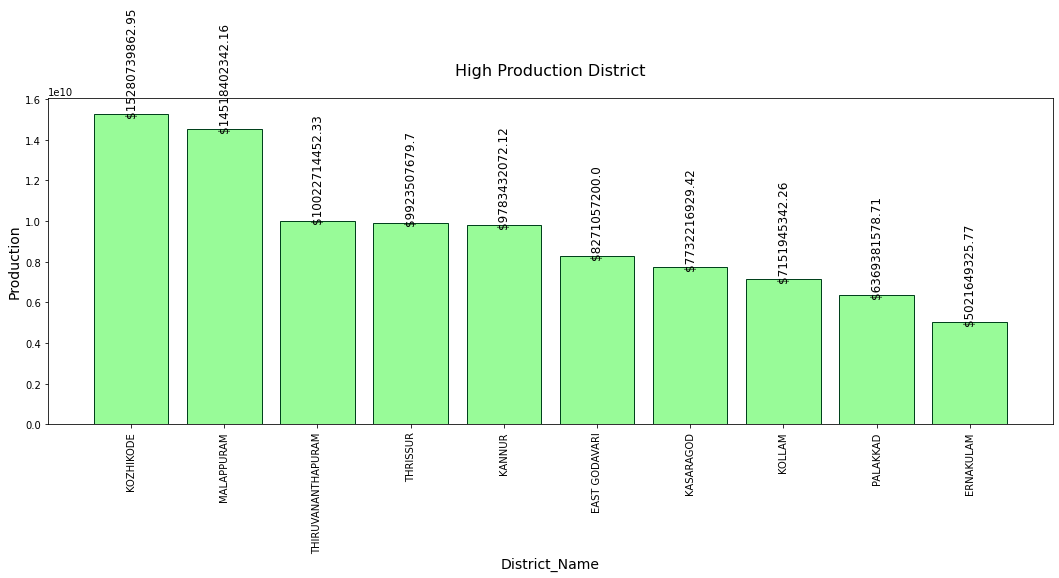

In [ ]:
plt.figure(figsize=[18,6])
plt.bar(top_district.index, top_district.Production, color='#98FB98', edgecolor='#01411C')
plt.xticks(rotation=90)
plt.title("High Production District\n", fontsize=16)
plt.xlabel('District_Name', fontsize=14)
plt.ylabel('Production', fontsize=14)

for i, v in top_district.Production.items():
    if v>50000:
        plt.text(i, v-4000, s='$'+str(v), color='k', fontsize=12 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+1000, s='$'+str(v), color='k', fontsize=12 ,rotation=90, horizontalalignment='center')
    
plt.show()

In [ ]:
top_season = crop.groupby(by=['Season']).sum().round(2)
top_season = top_season.sort_values('Production', ascending=False).head(10)

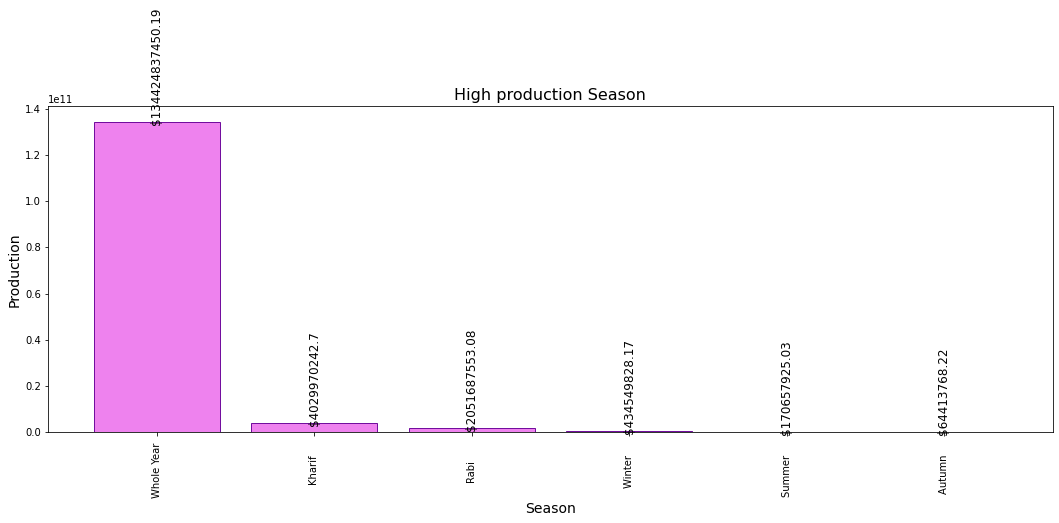

In [ ]:
plt.figure(figsize=[18,6])
plt.bar(top_season.index, top_season.Production, color='#EE82EE', edgecolor='#720e9e')
plt.xticks(rotation=90)
plt.title("High production Season", fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Production', fontsize=14)

for i, v in top_season.Production.items():
    if v>20000:
        plt.text(i, v-6000, s='$'+str(v), color='k', fontsize=12 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+1000, s='$'+str(v), color='k', fontsize=12 ,rotation=90, horizontalalignment='center')
    
plt.show()

In [ ]:
top_year = crop.groupby(by=['Crop_Year']).sum().round(2)
top_year = top_year.sort_values('Production', ascending=False).head(10)

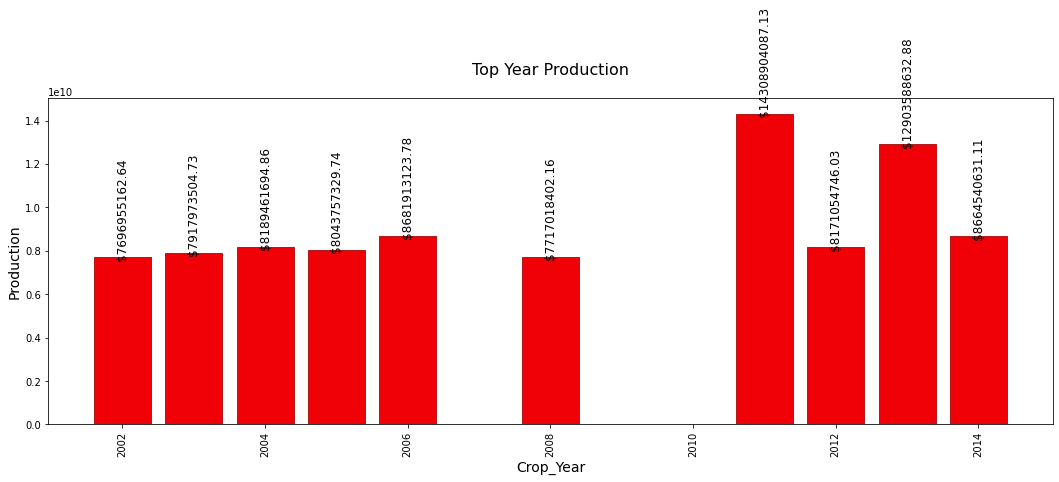

In [ ]:
plt.figure(figsize=[18,6])
plt.bar(top_year.index, top_year.Production, color='#EF0107', edgecolor='#B31B1B')
plt.xticks(rotation=90)
plt.title("Top Year Production\n", fontsize=16)
plt.xlabel('Crop_Year', fontsize=14)
plt.ylabel('Production', fontsize=14)

for i, v in top_year.Production.items():
    if v>15000:
        plt.text(i, v-8000, s='$'+str(v), color='black', fontsize=12 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+1000, s='$'+str(v), color='black', fontsize=12 ,rotation=90, horizontalalignment='center')
    
plt.show()

In [ ]:
top_crop= crop.groupby(by=['Crop']).sum().round(2)
top_crop = top_crop.sort_values('Production', ascending=False).head(10)

In [ ]:
Crop=top_crop.index
Production=top_crop.Production

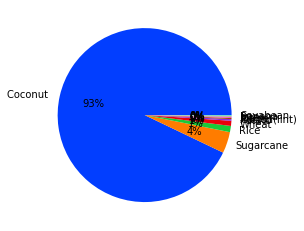

In [ ]:
palette_color = sns.color_palette('bright')
# plotting data on chart
plt.pie(Production, labels=Crop, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()